In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
data = pd.read_csv(r'C:\Users\Ignatius\Downloads\churn dataset.csv')

In [5]:
data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.9

In [7]:
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


<Axes: ylabel='Usage Frequency'>

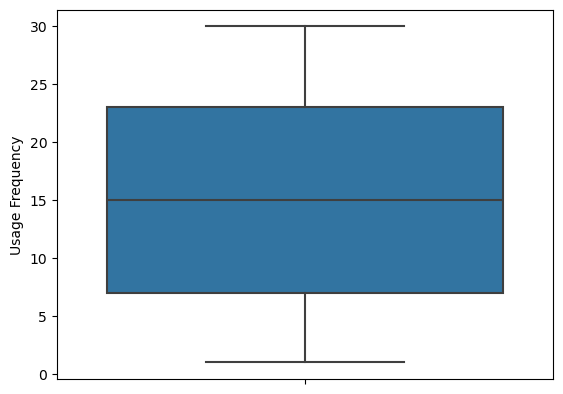

In [8]:
# checking for outliers using boxplot
sns.boxplot(y='Usage Frequency', data=data)


<Axes: ylabel='Payment Delay'>

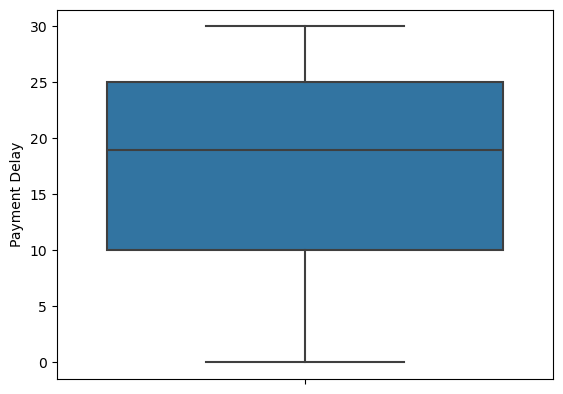

In [9]:
sns.boxplot(y='Payment Delay', data=data)


<Axes: ylabel='Total Spend'>

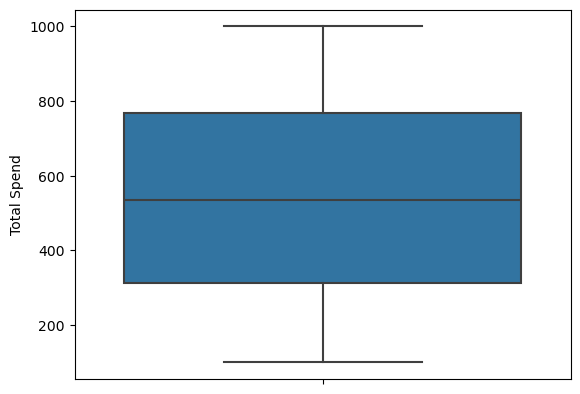

In [10]:
sns.boxplot(y='Total Spend', data=data)

In [11]:

# Encode categorical variables
label_encoder = LabelEncoder()

In [12]:
# Encode 'Gender', 'Subscription Type', and 'Contract Length'
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Subscription Type'] = label_encoder.fit_transform(data['Subscription Type'])
data['Contract Length'] = label_encoder.fit_transform(data['Contract Length'])

In [13]:
# Split the dataset into training and testing sets
X = data.drop(['CustomerID', 'Churn'], axis=1)  # Drop irrelevant columns
y = data['Churn']

In [27]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18


In [14]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# make predictions
y_pred = model.predict(X_test)


In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [19]:
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.81      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



In [20]:
coefficients = model.coef_
intercept = model.intercept_

In [23]:
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

In [25]:
# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame(model.coef_, columns=feature_names)
print("Model Coefficients:")
print(coefficients_df)

print("\nModel Intercept:")
print(model.intercept_)


Model Coefficients:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    0.26522  -0.570362   0.593799  -0.515955   1.015136   1.855139   

   Feature_6  Feature_7  Feature_8  Feature_9  
0  -0.031274   -0.06535  -0.253981  -0.003921  

Model Intercept:
[-0.32353137]
